<a href="https://colab.research.google.com/github/643020514-7/643020514-7/blob/main/Project1_66.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Text Analytics

<img src="https://www.datanami.com/wp-content/uploads/2014/06/text-analytics.png" width="300">

## Due Date: Sunday, October 1, 2023
<br>
<span style="color:red">NOTE: There are always last minute issues submitting the case studies. DO NOT WAIT UNTIL THE LAST MINUTE!</span>

## List team members:

1. <Name> <ID> <Email>
2. <Name> <ID> <Email>
3. <Name> <ID> <Email>

**NOTE1**: Please don't forget to save the notebook frequently when working in IPython Notebook, otherwise the changes you made can be lost

**NOTE2**: Create a slide presentation once finished, convert to pdf format, and turn in by one group member only
<br>A list of documents to turn in: 1) Jupyter notebook containing results and 2) A set of slides in pdf format

In [129]:
!pip3 install wordcloud

In [130]:
!pip3 install twitter-scraper-selenium

In [131]:
# Load these libraries
import json
import pprint
import pandas as pd
from io import StringIO # using StringIO to prevent ValueError
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import urllib.request

import matplotlib.pyplot as plt
%matplotlib inline

In [132]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Problem 1: Working with Twitter Data and JSON file

We are working with a Twitter dataset in JSON format from `thailand_tweets.txt`.<br>
The tweets were scraped using "Thailand" keyword on August 31, 2022.<br>
We are going to examine the dataset and retrieve information from the JSON file.
Most Twitter datasets provide only Tweet ID where we can retrieve tweets from tweet ID as follow.
```
twitter.com/anyuser/status/<tweet_id>
```

#### Read JSON file

In [133]:
# read the file


In [134]:
file = open('/content/drive/MyDrive/python warehouse/thailand_tweets.txt','r') # rename
foo = file.read()
d = json.loads(foo)

In [135]:
# inspect the file
thai_tweets  = json.loads(d)
thai_tweets

{'1564764893038882816': {'tweet_id': '1564764893038882816',
  'username': 'matthunter',
  'name': 'MATT HUNTΞR',
  'profile_picture': 'https://twitter.com/matthunter/photo',
  'replies': 2,
  'retweets': 1,
  'likes': 7,
  'is_retweet': False,
  'posted_time': '2022-08-30T23:59:57+00:00',
  'content': 'Thanks for asking! Yes, we will support shipping to most countries, including Japan and Thailand. ',
  'hashtags': [],
  'mentions': [],
  'images': [],
  'videos': [],
  'tweet_url': 'https://twitter.com/matthunter/status/1564764893038882816',
  'link': ''},
 '1564764866598080513': {'tweet_id': '1564764866598080513',
  'username': 'DavSmithVP',
  'name': 'DavSmith / Virtual Photography',
  'profile_picture': 'https://twitter.com/DavSmithVP/photo',
  'replies': 0,
  'retweets': 0,
  'likes': 2,
  'is_retweet': False,
  'posted_time': '2022-08-30T23:59:50+00:00',
  'content': 'Tomb Raider Underworld | Thailand \n#VirtualPhotography \n@tombraider\n @crystaldynamics',
  'hashtags': ['Virtua

#### Pretty print json/dict object

Possible approaches:
* In fact, `pandas` has `pandas.read_json(<file_dir>)` function to read json file into dataframe
* As we create a data dict, we can also read our data dict into a pandas dataframe

### Your report
* The total number of tweets collected in the file:
* The content of the first tweet:
* Is the first tweet contained any hashtags or mentions?
* Collect all hashtags related to Thailand from this data
* Find the most popular tweets in your collection of tweets, i.e. the tweets with the largest number of retweet/replies/likes counts
    * You are free to define your own popularity metric
* Display the top 5 tweets that are the most popular among your collection
* Create a word cloud of words in the contents; however, we note that this word cloud is not a good representation of Thailand as the data size is small

##The total number of tweets collected in the file:

In [136]:
len(set(thai_tweets)) #how to 1

29

In [209]:
all_key = list(thai_tweets.keys())[:]  #how to 2

num_all_key = len(all_key)
print(f'จำนวนtweetsทั้งหมดคือ',num_all_key)

จำนวนtweetsทั้งหมดคือ 29


##The content of the first tweet:

In [212]:
first_key = list(thai_tweets.keys())[0]  #
first_content = thai_tweets[first_key]['content']

print(f'contentแรก คือ:',first_content)

contentแรก คือ: Thanks for asking! Yes, we will support shipping to most countries, including Japan and Thailand. 


##Is the first tweet contained any hashtags or mentions?

In [213]:
first = thai_tweets[first_key]
keys=['hashtags','mentions']                      ### ทดสอบ ###

hm = list( map(first.get, keys) )


if not any(isinstance(item, str) for item in hm):
    print("empty")
else:
    print("ืnot empty")



empty


In [177]:

# tweet แรกพร้อม hashtags และ mentions
first_tweet_id = next(iter(thai_tweets))
first_tweet_name = thai_tweets[first_tweet_id]['name']
first_tweet_username = thai_tweets[first_tweet_id]['username']
first_tweet_hashtags = thai_tweets[first_tweet_id]['hashtags']
first_tweet_mentions = thai_tweets[first_tweet_id]['mentions']
first_tweet_content = thai_tweets[first_tweet_id]['content']

print("Username:", (first_tweet_username))
print("name:", (first_tweet_name))
print("ในเนื้อหา:", (first_tweet_content))
# ตรวจสอบว่าทวีตแรกมี hashtags และ mentionsไหม และ print ออกมา
if first_tweet_hashtags:
    print("Hashtags:", ', '.join(first_tweet_hashtags))
else:
    print("ไม่มีแฮชแท็กในทวีตนี้.")

if first_tweet_mentions:
    print("Mentions:", ', '.join(first_tweet_mentions))
else:
    print("ไม่มีการกล่าวถึงในทวีตนี้.")


Username: matthunter
name: MATT HUNTΞR
ในเนื้อหา: Thanks for asking! Yes, we will support shipping to most countries, including Japan and Thailand. 
ไม่มีแฮชแท็กในทวีตนี้.
ไม่มีการกล่าวถึงในทวีตนี้.


##Collect all hashtags related to Thailand from this data

In [214]:
thailand_hashtags_data = []


for tweet_id, tweet_data in thai_tweets.items():
    content = tweet_data['content']
    hashtags = [tag.strip('#') for tag in content.split() if tag.startswith('#')]


    thailand_hashtags = [tag for tag in hashtags if 'thailand' in tag.lower()]


    thailand_hashtags_data.extend(thailand_hashtags)


thailand__hashtags = list(set(thailand_hashtags_data))


print(f'แฮชแท็กทั้งหมดที่เกี่ยวข้องกับประเทศไทยคือ:',thailand_hashtags_data)

แฮชแท็กทั้งหมดที่เกี่ยวข้องกับประเทศไทยคือ: ['thailand', 'Thailand']


##Find the most popular tweets in your collection of tweets, i.e. the tweets with the largest number of retweet/replies/likes counts
* You are free to define your own popularity metric

In [180]:
most_retweeted_tweet = None
most_liked_tweet = None

for tweet_id, data in thai_tweets.items():

    replies = data.get('replies', 0)
    retweets = data.get('retweets', 0)
    likes = data.get('likes', 0)
    username = data.get('username',0)


    if most_retweeted_tweet is None or retweets > most_retweeted_tweet['retweets']:
        most_retweeted_tweet = {'tweet_id': tweet_id, 'retweets': retweets,'username':username}



    if most_liked_tweet is None or likes > most_liked_tweet['likes']:
        most_liked_tweet = {'tweet_id': tweet_id, 'likes': likes,'username': username}


print("Tweet ที่มี Retweet มากที่สุดคือของ:",most_retweeted_tweet['username'],"มียอด Retweet",most_retweeted_tweet['retweets'])
print("Tweet ที่มี Like มากที่สุดคือของ:",most_liked_tweet['username'],"มียอด Like",most_liked_tweet['likes'])

Tweet ที่มี Retweet มากที่สุดคือของ: OhmPawatInter มียอด Retweet 99
Tweet ที่มี Like มากที่สุดคือของ: OhmPawatInter มียอด Like 143


##Display the top 5 tweets that are the most popular among your collection

In [195]:
sorted_tweets = sorted(thai_tweets.values(), key=lambda x: x['likes'], reverse=True)

# top 5 tweets
top_5_tweets = sorted_tweets[:5]
for i, tweet in enumerate(top_5_tweets, start=1):
    print(f"Top {i} Tweet:")
    print(f"Username: {tweet['username']}")
    print(f"Likes: {tweet['likes']}")
    print(f"Content: {tweet['content']}")
    print(f"Tweet URL: {tweet['tweet_url']}")
    print("-" * 95)


Top 1 Tweet:
Username: OhmPawatInter
Likes: 143
Content: Trend twitter update 

Top Twitter influencers in Thailand today 
#4 
@ohmpawatt
Influence Score: 19442
7 top tweets
25182 retweets

https://etrenders.com/trendsetters/Thailand…
#ohmpawat #ยิ้ม5พันของโอมภวัต
Tweet URL: https://twitter.com/OhmPawatInter/status/1564764445825458181
-----------------------------------------------------------------------------------------------
Top 2 Tweet:
Username: Zeepruk_jfc
Likes: 32
Content: Can you help me?

tracking number
FMP200001150XX

Does anyone know a shipping company in Thailand that handles this number?
I'm in trouble with no reply even if I contact the caller 

#Zunshine
Tweet URL: https://twitter.com/Zeepruk_jfc/status/1564762341324992513
-----------------------------------------------------------------------------------------------
Top 3 Tweet:
Username: nato_tonyo11
Likes: 18
Content: Good morning  world! And goodmorning to you too #DonnyPangilinan, enjoy Thailand babe and please d

##Create a word cloud of words in the contents; however, we note that this word cloud is not a good representation of Thailand as the data size is small

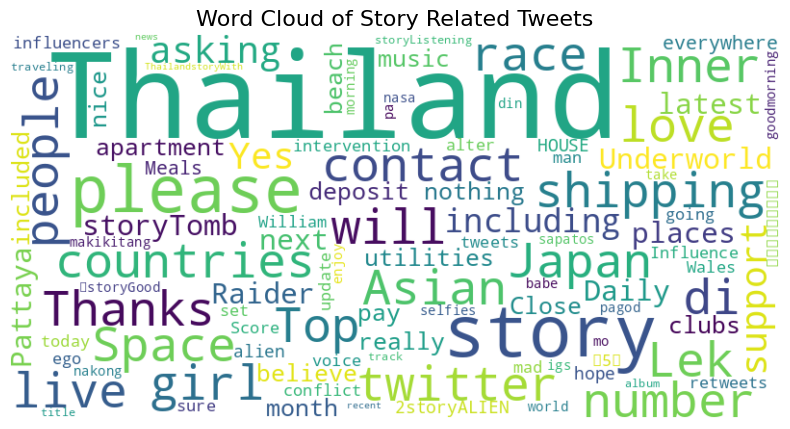

In [196]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re


tweet_texts = [tweet['content'] for tweet in thai_tweets.values()]

# รวมข้อความtweetทั้งหมดไว้ในสตริงเดียว
combined_text = 'story'.join(tweet_texts)

# ลบ URL ,@ และแฮชแท็ก
combined_text = re.sub(r'http\S+|@\w+|#\w+', '', combined_text)

# สร้าง worldcloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis', max_words=100).generate(combined_text)

# Plot WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Story Related Tweets', fontsize=16)
plt.axis('off')
plt.show()


Note: ไม่ต้องรายงานส่วนนี้ในสไลด์

## Problem 2 Study Trip Advisor Hotel Reviews Sentiment

We are working with the Trip Advisor Hotel Reviews dataset. You can see the source from https://www.kaggle.com/datasets/andrewmvd/trip-advisor-hotel-reviews.

* Analyze the data to find out what make a hotel good or bad
<br>You may create a tag of "positive", "negative", or "neural" sentiment first. After tagging each tweet with different sentiment, we can separate positive tweets and negative tweets. Then, it is easier to find our common patterns in positive tweets or good hotels, and vice versa.

#----------------------------------------------
##Your code starts here
- label each tweet as positive, negative, and neural sentiment
- combine tweet texts in each type
- tokenize texts
- convert to lower case
- remove stop words
- remove any other stop words, like RT
- remove punctuations
- remove other symbols?
- analyze word frequency in each sentiment type and so on
- create some data visualization for the analysis and your presentation

In [198]:
import pandas as pd
import re
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [199]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [204]:
hotel = pd.read_csv('/content/drive/MyDrive/python warehouse/tripadvisor_hotel_reviews.csv')

In [205]:
hotel.columns

Index(['Review', 'Rating'], dtype='object')

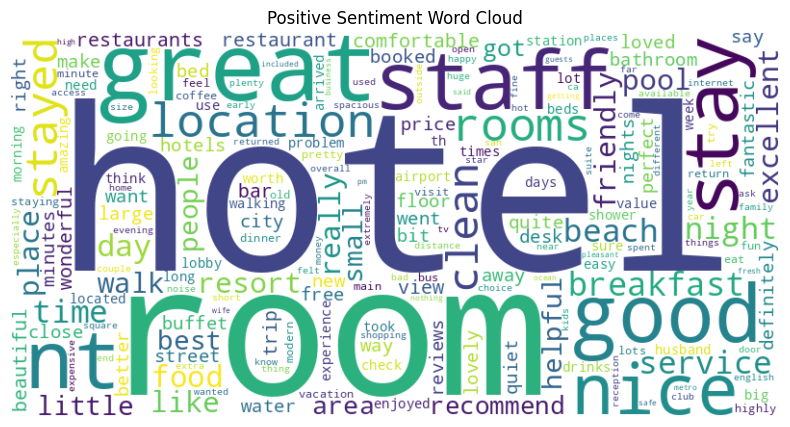

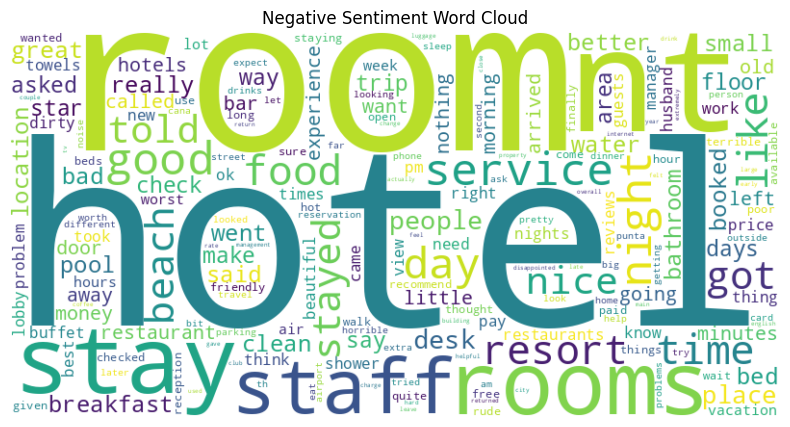

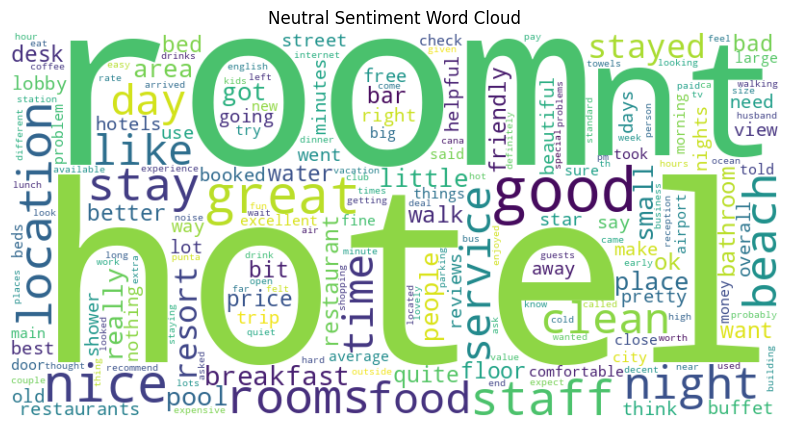

In [208]:
#สร้าง reviews,ratings
reviews = hotel['Review']
ratings = hotel['Rating']

# สร้าง DataFrame
df = pd.DataFrame({'Review': reviews, 'Rating': ratings})

# Label each review as Positive, Negative, or Neutral based on the Rating (กำกับการให้คะแนนโดยมี positive,negative,neutral)
def label_sentiment(rating):
    if rating >= 4:
        return 'Positive'
    elif rating <= 2:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment'] = df['Rating'].apply(label_sentiment)


# ทำการรวมข้อความของแค่ละreviews คือ positive,negative,neutral
positive_reviews = " ".join(df[df['Sentiment'] == 'Positive']['Review'])
negative_reviews = " ".join(df[df['Sentiment'] == 'Negative']['Review'])
neutral_reviews = " ".join(df[df['Sentiment'] == 'Neutral']['Review'])

# Tokenization, lowercase conversion, and removing stopwords, RT, จัดการเครื่องหมายต่างๆ
def preprocess_text(text):
    # Tokenization
    words = nltk.word_tokenize(text)

    # Convert to lowercase
    words = [word.lower() for word in words]

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    #  จัดการเครื่องหมายใน Twitter
    words = [re.sub(r'^RT$|[^a-zA-Z]', '', word) for word in words]

    return " ".join(words)

positive_reviews = preprocess_text(positive_reviews)
negative_reviews = preprocess_text(negative_reviews)
neutral_reviews = preprocess_text(neutral_reviews)

# การหาความถี่ของคำ
def word_frequency(text):
    words = nltk.word_tokenize(text)
    freq_dist = nltk.FreqDist(words)
    return freq_dist

positive_freq_dist = word_frequency(positive_reviews)
negative_freq_dist = word_frequency(negative_reviews)
neutral_freq_dist = word_frequency(neutral_reviews)

# Visualization: สร้าง Word Cloud
def generate_word_cloud(freq_dist, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(freq_dist)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

generate_word_cloud(positive_freq_dist, 'Positive Sentiment Word Cloud')
generate_word_cloud(negative_freq_dist, 'Negative Sentiment Word Cloud')
generate_word_cloud(neutral_freq_dist, 'Neutral Sentiment Word Cloud')


In [ ]:

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

# Sample reviews (replace with your actual reviews)
reviews = hotel['Review']

# Initialize the sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Create lists to store positive, negative, and neutral reviews
positive_reviews = []
negative_reviews = []
neutral_reviews = []

# Classify each review based on sentiment
for review in reviews:
    sentiment_scores = sid.polarity_scores(review)
    compound_score = sentiment_scores['compound']

    if compound_score >= 0.1:
        positive_reviews.append(review)
    elif compound_score <= -0.1:
        negative_reviews.append(review)
    else:
        neutral_reviews.append(review)

# Print the classified reviews
print("Positive Reviews:")
for review in positive_reviews:
    print(review)

print("\nNegative Reviews:")
for review in negative_reviews:
    print(review)

print("\nNeutral Reviews:")
for review in neutral_reviews:
    print(review)


test

In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')


In [ ]:

#สร้าง reviews,ratings
reviews = hotel['Review']
ratings = hotel['Rating']

# สร้าง DataFrame
df = pd.DataFrame({'Review': reviews, 'Rating': ratings})

# Label each review as Positive, Negative, or Neutral based on the Rating (กำกับการให้คะแนนโดยมี positive,negative,neutral)
def label_sentiment(rating):
    if rating >= 4:
        return 'Positive'
    elif rating <= 2:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment'] = df['Rating'].apply(label_sentiment)

positive = " ".join(df[df['Sentiment'] == 'Positive']['Review'])
negative = " ".join(df[df['Sentiment'] == 'Negative']['Review'])
neutral = " ".join(df[df['Sentiment'] == 'Neutral']['Review'])

In [ ]:
a = positive
b = negative
c = neutral

In [ ]:
positive_reviews = []
negative_reviews = []
neutral_reviews = []

sid = SentimentIntensityAnalyzer()
for review in a:
    sentiment_scores = sid.polarity_scores(review)
    compound_score = sentiment_scores['compound']

    if compound_score >= 0.1:
        positive_reviews.append(review)
    elif compound_score <= -0.1:
        negative_reviews.append(review)
    else:
        neutral_reviews.append(review)

# Tokenization, lowercase conversion, and removing stopwords, RT, จัดการเครื่องหมายต่างๆ
def preprocess_text(text):
    # Tokenization
    words = nltk.word_tokenize(text)

    # Convert to lowercase
    words = [word.lower() for word in words]

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    #  จัดการเครื่องหมายใน Twitter
    words = [re.sub(r'^RT$|[^a-zA-Z]', '', word) for word in words]

    return " ".join(words)

positive_reviews = preprocess_text(positive_reviews)
negative_reviews = preprocess_text(negative_reviews)
neutral_reviews = preprocess_text(neutral_reviews)

# การหาความถี่ของคำ
def word_frequency(text):
    words = nltk.word_tokenize(text)
    freq_dist = nltk.FreqDist(words)
    return freq_dist

positive_freq_dist = word_frequency(positive_reviews)
negative_freq_dist = word_frequency(negative_reviews)
neutral_freq_dist = word_frequency(neutral_reviews)

test2

In [ ]:
import nltk
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

# Replace these with your actual reviews and ratings
reviews = hotel['Review']
ratings = hotel['Rating']

# Create a DataFrame
df = pd.DataFrame({'Review': reviews, 'Rating': ratings})

# Label each review as Positive, Negative, or Neutral based on the Rating
def label_sentiment(rating):
    if rating >= 4:
        return 'Positive'
    elif rating <= 2:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment'] = df['Rating'].apply(label_sentiment)

# Initialize the Sentiment Intensity Analyzer
sid = SentimentIntensityAnalyzer()

# Create lists to store positive, negative, and neutral reviews
positive_reviews = [" ".join(df[df['Sentiment'] == 'Positive']['Review'])]
negative_reviews = [" ".join(df[df['Sentiment'] == 'Negative']['Review'])]
neutral_reviews = [" ".join(df[df['Sentiment'] == 'Neutral']['Review'])]

# Classify each labeled review based on sentiment
for index, row in df.iterrows():
    review = row['Review']
    sentiment_scores = sid.polarity_scores(review)
    compound_score = sentiment_scores['compound']

    if compound_score >= 0.1:
        positive_reviews.append(review)
    elif compound_score <= -0.1:
        negative_reviews.append(review)
    else:
        neutral_reviews.append(review)

# Now you have three lists: positive_reviews, negative_reviews, and neutral_reviews,
# each containing reviews labeled by sentiment and further classified based on sentiment scores.


# Tokenization, lowercase conversion, and removing stopwords, RT, จัดการเครื่องหมายต่างๆ
def preprocess_text(text):
    # Tokenization
    words = nltk.word_tokenize(text)

    # Convert to lowercase
    words = [word.lower() for word in words]

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    #  จัดการเครื่องหมายใน Twitter
    words = [re.sub(r'^RT$|[^a-zA-Z]', '', word) for word in words]

    return " ".join(words)

positive_reviews = preprocess_text(positive_reviews)
negative_reviews = preprocess_text(negative_reviews)
neutral_reviews = preprocess_text(neutral_reviews)

# การหาความถี่ของคำ
def word_frequency(text):
    words = nltk.word_tokenize(text)
    freq_dist = nltk.FreqDist(words)
    return freq_dist

positive_freq_dist = word_frequency(positive_reviews)
negative_freq_dist = word_frequency(negative_reviews)
neutral_freq_dist = word_frequency(neutral_reviews)

# Visualization: สร้าง Word Cloud
def generate_word_cloud(freq_dist, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(freq_dist)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

generate_word_cloud(positive_freq_dist, 'Positive Sentiment Word Cloud')
generate_word_cloud(negative_freq_dist, 'Negative Sentiment Word Cloud')
generate_word_cloud(neutral_freq_dist, 'Neutral Sentiment Word Cloud')


test3

In [ ]:
import nltk
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud

nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')

# Replace these with your actual reviews and ratings
reviews = hotel['Review']
ratings = hotel['Rating']

# Create a DataFrame
df = pd.DataFrame({'Review': reviews, 'Rating': ratings})

# Label each review as Positive, Negative, or Neutral based on the Rating
def label_sentiment(rating):
    if rating >= 4:
        return 'Positive'
    elif rating <= 2:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment'] = df['Rating'].apply(label_sentiment)

# Initialize the Sentiment Intensity Analyzer
sid = SentimentIntensityAnalyzer()

# Create lists to store positive, negative, and neutral reviews
positive_reviews = [" ".join(df[df['Sentiment'] == 'Positive']['Review'])]
negative_reviews = [" ".join(df[df['Sentiment'] == 'Negative']['Review'])]
neutral_reviews = [" ".join(df[df['Sentiment'] == 'Neutral']['Review'])]
# Classify each labeled review based on sentiment
for index, row in df.iterrows():
    review = row['Review']
    sentiment_scores = sid.polarity_scores(review)
    compound_score = sentiment_scores['compound']

    if compound_score >= 0.1:
        positive_reviews.append(review)
    elif compound_score <= -0.1:
        negative_reviews.append(review)
    else:
        neutral_reviews.append(review)

# Now you have three lists: positive_reviews, negative_reviews, and neutral_reviews,
# each containing reviews labeled by sentiment and further classified based on sentiment scores.

# Tokenization, lowercase conversion, and removing stopwords, RT, จัดการเครื่องหมายต่างๆ
def preprocess_text(text):
    # Tokenization
    words = nltk.word_tokenize(text)

    # Convert to lowercase
    words = [word.lower() for word in words]

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    #  จัดการเครื่องหมายใน Twitter
    words = [re.sub(r'^RT$|[^a-zA-Z]', '', word) for word in words]

    return " ".join(words)

# Preprocess each review separately
positive_reviews = [preprocess_text(review) for review in positive_reviews]
negative_reviews = [preprocess_text(review) for review in negative_reviews]
neutral_reviews = [preprocess_text(review) for review in neutral_reviews]

# Rest of your code for word frequency and visualization should work as expected.



In [ ]:
df.iterrows()



In [ ]:
positive_reviews

test4

### Report
* How did you analyze the data?
* What did you find in the data? (please include figures or tables in the report, but no source code)

## Problem 3 Collect and Analyze Your Interesting Topic

* Select a topic that your group members are interested
* Gather url from at least 3 webpages
* Use urllib.request to retrieve data from webpage
* Clean and find intersting patterns and information
* Create a word cloud of your topic

In [ ]:
#----------------------------------------------
# Your code starts here




### Report
* What did you find out about your topic? (please include figures or tables in the report, but no source code)

# ☃️ The End of Project 1 ☃️